# PageRank

In this problem, you have to implement PageRank algorithm to rank papers based on their references.

PageRank is a link analysis algorithm and it assigns a numerical weighting to each element of a hyperlinked set of documents, such as the World Wide Web, with the purpose of "measuring" its relative importance within the set. The algorithm may be applied to any collection of entities with reciprocal quotations and references.

It's recommended to have a look at the following sources to get more familiar with PageRank:

[https://en.wikipedia.org/wiki/PageRank](https://en.wikipedia.org/wiki/PageRank)

[https://towardsdatascience.com/pagerank-3c568a7d2332](https://towardsdatascience.com/pagerank-3c568a7d2332)

## Dataset
You are given a number of papers in Computer Science field, which are crawled from [Semantic Scholar](https://www.semanticscholar.org/). Each paper has Id, title, references, etc. You can download the dataset from here. For your convenience, we have considered only a limited number of references for each paper.


## Hint
Each paper is a node in the graph. Paper A links to paper B if and only if B is in A's references. (Similary, we have a directed edge from A to B.) Note that some papers may not have any input or output edge. Don't forget to consider such papers as well.

### Using libraries such as networkx is not allowed (Except in the last part). You have to implement PageRank from scratch. Feel free to add cells when needed.   


## Download data, import dependencies

In [26]:
student_number = 99105691
name = 'mohammad javad maheronnaghsh'

In [1]:
# Download resources https://drive.google.com/drive/folders/1GvUc06eKX2Knf3JP5RCvIJjUkIjE2fTu?usp=share_link
!mkdir -p resources
%cd ./resources
!gdown 1C9l4uWzABZomkZQdAMxETz-b12PcOzBv # clean_data.json
%cd ..

/content/resources
Downloading...
From: https://drive.google.com/uc?id=1C9l4uWzABZomkZQdAMxETz-b12PcOzBv
To: /content/resources/clean_data.json
100% 23.3M/23.3M [00:00<00:00, 227MB/s]
/content


In [2]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import json
import networkx as nx
import requests
from time import sleep
tqdm.pandas()

In [3]:
df = pd.read_json('resources/clean_data.json')
print(df.shape)
df.head()

(7136, 8)


paperId  \
0  63d8426ba1f51a8525dd19fd8ec92934ec71aea5   
1  33ec7eb2168e37e3007d1059aa96b9a63254b4da   
2  642038c7a49caa9f0ac5b37b01fab5b2b8d981d5   
3  58ed1fbaabe027345f7bb3a6312d41c5aac63e22   
4  d47a682723f710395454687319bb55635e653105   

                                               title  \
0   A Survey of Data Augmentation Approaches for NLP   
1  Beyond Accuracy: Behavioral Testing of NLP Mod...   
2  ERASER: A Benchmark to Evaluate Rationalized N...   
3  Retrieval-Augmented Generation for Knowledge-I...   
4  Language (Technology) is Power: A Critical Sur...   

                                            abstract  year  referenceCount  \
0  Data augmentation has recently seen increased ...  2021             196   
1  Although measuring held-out accuracy has been ...  2020              33   
2  State-of-the-art models in NLP are now predomi...  2019              75   
3  Large pre-trained language models have been sh...  2020              71   
4  We survey 146 papers analyzing “bias” in NLP s...  2020             238   

   citationCount                                            authors  \
0            117  [{'authorId': '152913678', 'name': 'Steven Y. ...   
1            386  [{'authorId': '78846919', 'name': 'Marco Tulio...   
2            217  [{'authorId': '48727916', 'name': 'Jay DeYoung...   
3            339  [{'authorId': '145222654', 'name': 'Patrick Le...   
4            324  [{'authorId': '3422038', 'name': 'Su Lin Blodg...   

                                        k_references  
0  [{'paperId': '00ea88920eca898909bd8dd455df25ec...  
1  [{'paperId': '05dd7254b632376973f3a1b4d39485da...  
2  [{'paperId': '0754982927fa07a6689fb0f2cbeb8e3d...  
3  [{'paperId': '016368185723d0ec99aafa4b59273005...  
4  [{'paperId': '00059087c954c1af6ece33115315e3e0...

## PageRank
Implement PageRank from scratch!


*   Don't forget to consider the damping factor in your implementation.
*   Report number of nodes and number of edges of the constructed graph.
*   Identify the node with maximum number of input edges. Which paper corresponds to this node?
*   Report 10 most importatnt papers with PageRank.

See the most important paper according to PageRank. Recall that papers are in CS and NLP topics. What is your opinion about this paper? :)



In [4]:
class graph_c:
  def __init__(self):
    self.node_number = len(df['paperId'])
    self.edge_number = 0
    self.dict_map_id_to_number = {}
    self.map_id_to_number()
    self.all_nodes_and_edges = [[] for i in range(self.node_number)]
    self.all_parents = [[] for i in range(self.node_number)]
    self.add_all_edges()

  def add_edge(self, index_of_start, id_of_end):
    if id_of_end not in self.dict_map_id_to_number:
      return
    index_of_end = self.dict_map_id_to_number[id_of_end]
    self.edge_number += 1
    self.all_nodes_and_edges[index_of_start].append(index_of_end)

  def add_parent(self, index_of_parent, id_of_child):
    if id_of_child not in self.dict_map_id_to_number:
      return
    index_of_child = self.dict_map_id_to_number[id_of_child]
    self.all_parents[index_of_child].append(index_of_parent)
  
  def add_all_edges(self):
    for counter_article in range(self.node_number):
      references = df.iloc[counter_article]['k_references']
      for reference in references:
        self.add_edge(index_of_start = counter_article, id_of_end = reference['paperId'])
        self.add_parent(counter_article, reference['paperId'])


  def map_id_to_number(self):
    counter = 0
    for id in df['paperId']:
      self.dict_map_id_to_number[id] = counter
      counter += 1

def construct_graph():
  graph = graph_c()
  number_of_nodes, number_of_edges, all_nodes_and_edges = graph.node_number, graph.edge_number, graph.all_nodes_and_edges
  print("Number of nodes = " + str(number_of_nodes))
  print("Number of edges = " + str(number_of_edges))
  print("List of adjacents is :")
  print(all_nodes_and_edges)
  print("List of parents is :")
  print(graph.all_parents)
  return graph

  '''
  i got help from the second link:
  https://towardsdatascience.com/pagerank-3c568a7d2332
  to write this code
  ''' 
def update_pagerank(index, damping_factor, n, pageRanks, graph):
  in_neighbors = graph.all_parents[index]
  pagerank_sum = sum((pageRanks[node] / len(graph.all_nodes_and_edges[node])) for node in in_neighbors)
  random_walk = damping_factor / n
  pageRanks[index] = random_walk + (1-damping_factor) * pagerank_sum

def PageRank_one_iter(pageRanks, damping_factor, graph):
  node_number = len(df['paperId'])
  node_list = [i for i in range(node_number)]
  for node_index in node_list:
      update_pagerank(node_index, damping_factor, node_number, pageRanks, graph)

def calculate_pageRank(number_of_iterations, damping_factor, graph):
  damping_factor = 1.0 - damping_factor
  pageRanks = [1.0 for i in range(len(df['paperId']))]
  for iteration in range(number_of_iterations):
    PageRank_one_iter(pageRanks, damping_factor, graph)
  indexes = list(np.flip(np.argsort(pageRanks)))
  for index in range(10):
    print("********")
    print("Rank " + str(index + 1))
    print("title = " + df.iloc[indexes[index]]['title'])
    print("Index = " + str(indexes[index]))
  pageRanks.sort(reverse = True)
  print(pageRanks)


def pageRank():
  damping_factor = 0.9 # TODO
  graph = construct_graph()
  calculate_pageRank(1000, damping_factor, graph)
  return graph
  

In [5]:
graph = pageRank()

Number of nodes = 7136
Number of edges = 8415
List of adjacents is :
[[], [1535, 657, 743, 2135, 14, 1364], [117, 1364], [6968, 1364], [1260, 1166], [5495, 1535, 2135], [140], [105], [6549, 88], [2135], [76, 1589, 1549], [195, 117], [5764, 98, 88, 1322, 5485], [88, 1570, 114], [1405, 1711], [], [906, 126], [], [6824], [1516, 500, 657, 652], [1535, 657, 2135, 14], [], [3076, 1101, 287, 1364], [2557, 1399], [1535], [1166, 1535, 1363], [2309, 245], [], [6451, 1363, 1143, 85, 5643, 3430, 1352], [3006], [3051, 1555], [1552, 88, 1715], [88, 1415, 1376, 1274], [4342, 1552, 3006], [], [1535, 1405, 88, 3006], [195, 117, 4378, 1557], [], [98, 786, 88, 26, 2365], [], [5616, 112], [], [2327, 1725], [], [1474, 1725, 1727], [112, 1944], [1795], [342, 320], [5109, 1555], [], [1795, 1555, 3492], [1727], [], [341, 98], [98], [354, 5658], [342, 1964, 3232, 321], [], [1374, 373, 1565, 738, 175], [637, 5740], [], [5658, 98], [2036, 1540, 1353, 329, 1725], [], [], [], [], [4989, 1374, 1528], [5745, 5516], 

## Networkx
Implement PageRank with networkx. Report previous items and compare the results with your implementation. Explain if there is any differrence.

In [6]:
import matplotlib.pyplot as plt
from itertools import islice
class glob:
  miti = {}
def add_nodes(G):
  for paperId in range(len(df['paperId'])):
    G.add_node(paperId)

def add_edges(G):
  map_id_to_index = {}
  counter_id = 0
  for paperId in df['paperId']:
    map_id_to_index[paperId] = counter_id
    counter_id += 1
  counter_start = 0
  for references in df['k_references']:
    index_of_start = counter_start
    for reference in references:
      reference_id = reference['paperId']
      if reference_id not in map_id_to_index:
        continue
      index_of_end = map_id_to_index[reference_id]
      G.add_edge(index_of_start, index_of_end)
    counter_start += 1
  glob.miti = map_id_to_index

def print_information(G, RANKING, RANKING_sorted):
  print("\n\n********\nInfo of Graph")
  print(G)
  print("\n\n********\nRanking (using Networkx):")
  print(RANKING)
  print("\n\n********\nRanking After Sorting (using Networkx):")
  print(RANKING_sorted)
  print("\n\n********\nTop 10 Articles Info (using Networkx):")
  top10 = dict(islice(RANKING_sorted.items(), 0, 10))
  for rank, article in zip(range(0, 10), top10):
    print("\n# Rank " + str(rank + 1))
    title = df.iloc[article]['title']
    print("Title = " + title)
    authors = df.iloc[article]['authors']
    print("Author(s): ", end = '')
    for author in authors:
      print(author['name'], end = ' ')
    # print("Author = " + author)
    # global map_id_to_index
    dict_1 = glob.miti
    print("\nIndex =" + str(article))
    # print(dict_)
    # print("Index = " + dict_[article])
    print("\n\n")
 
 

def pageRank_networkx():
  G = nx.DiGraph()
  add_nodes(G)
  add_edges(G)
  RANKING = nx.pagerank(G, alpha=0.90)
  RANKING_sorted = {k: v for k, v in sorted(RANKING.items(), key=lambda item: item[1] ,reverse = True)} 
  
  print_information(G, RANKING, RANKING_sorted)
  print(glob.miti)
  return G



In [7]:
Graph = pageRank_networkx()



********
Info of Graph
DiGraph with 7136 nodes and 8415 edges


********
Ranking (using Networkx):
{0: 5.6217977305957096e-05, 1: 7.302332728512237e-05, 2: 5.6217977305957096e-05, 3: 5.6217977305957096e-05, 4: 5.6217977305957096e-05, 5: 5.6217977305957096e-05, 6: 5.6217977305957096e-05, 7: 0.00014543375818874927, 8: 5.6217977305957096e-05, 9: 5.6217977305957096e-05, 10: 0.00011122614083348076, 11: 5.6217977305957096e-05, 12: 8.661592000318917e-05, 13: 6.882198979033106e-05, 14: 0.00025492549297567843, 15: 5.6217977305957096e-05, 16: 5.6217977305957096e-05, 17: 5.6217977305957096e-05, 18: 5.6217977305957096e-05, 19: 5.6217977305957096e-05, 20: 5.6217977305957096e-05, 21: 5.6217977305957096e-05, 22: 5.6217977305957096e-05, 23: 5.6217977305957096e-05, 24: 5.6217977305957096e-05, 25: 5.6217977305957096e-05, 26: 0.00026368531037910777, 27: 5.6217977305957096e-05, 28: 5.6217977305957096e-05, 29: 5.6217977305957096e-05, 30: 5.6217977305957096e-05, 31: 0.00011350485923460038, 32: 5.621797730

In [8]:
!pip install --upgrade scipy networkx 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!pip --upgrade all


Usage:   
  pip3 <command> [options]

no such option: --upgrade


In [10]:
# !jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10 
!jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10


|WARNING|Notebook version 5 is no longer maintained. Please upgrade to version 6 or later.
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-notebook", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.8/dist-packages/jupyter_core/application.py", line 276, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/traitlets/config/application.py", line 991, in launch_instance
    app.initialize(argv)
  File "/usr/local/lib/python3.8/dist-packages/traitlets/config/application.py", line 113, in inner
    return method(app, *args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/notebook/notebookapp.py", line 1631, in initialize
    self.init_webapp()
  File "/usr/local/lib/python3.8/dist-packages/notebook/notebookapp.py", line 1408, in init_webapp
    self.http_server.listen(port, self.ip)
  File "/usr/local/lib/python3.8/dist-packages/tornado/tcpserver.py", line 151, in listen
 

In [11]:
def draw_plt_of_first_n_articles(G, n):
  # draw relationships between first n articles
  fig = plt.figure()
  fig.set_size_inches(40, 40)
  nx.draw(G.subgraph([i for i in range(n)]), node_color="black", node_size = 2 , edge_color = 'blue', width = 0.5, with_labels=True)
  plt.show()


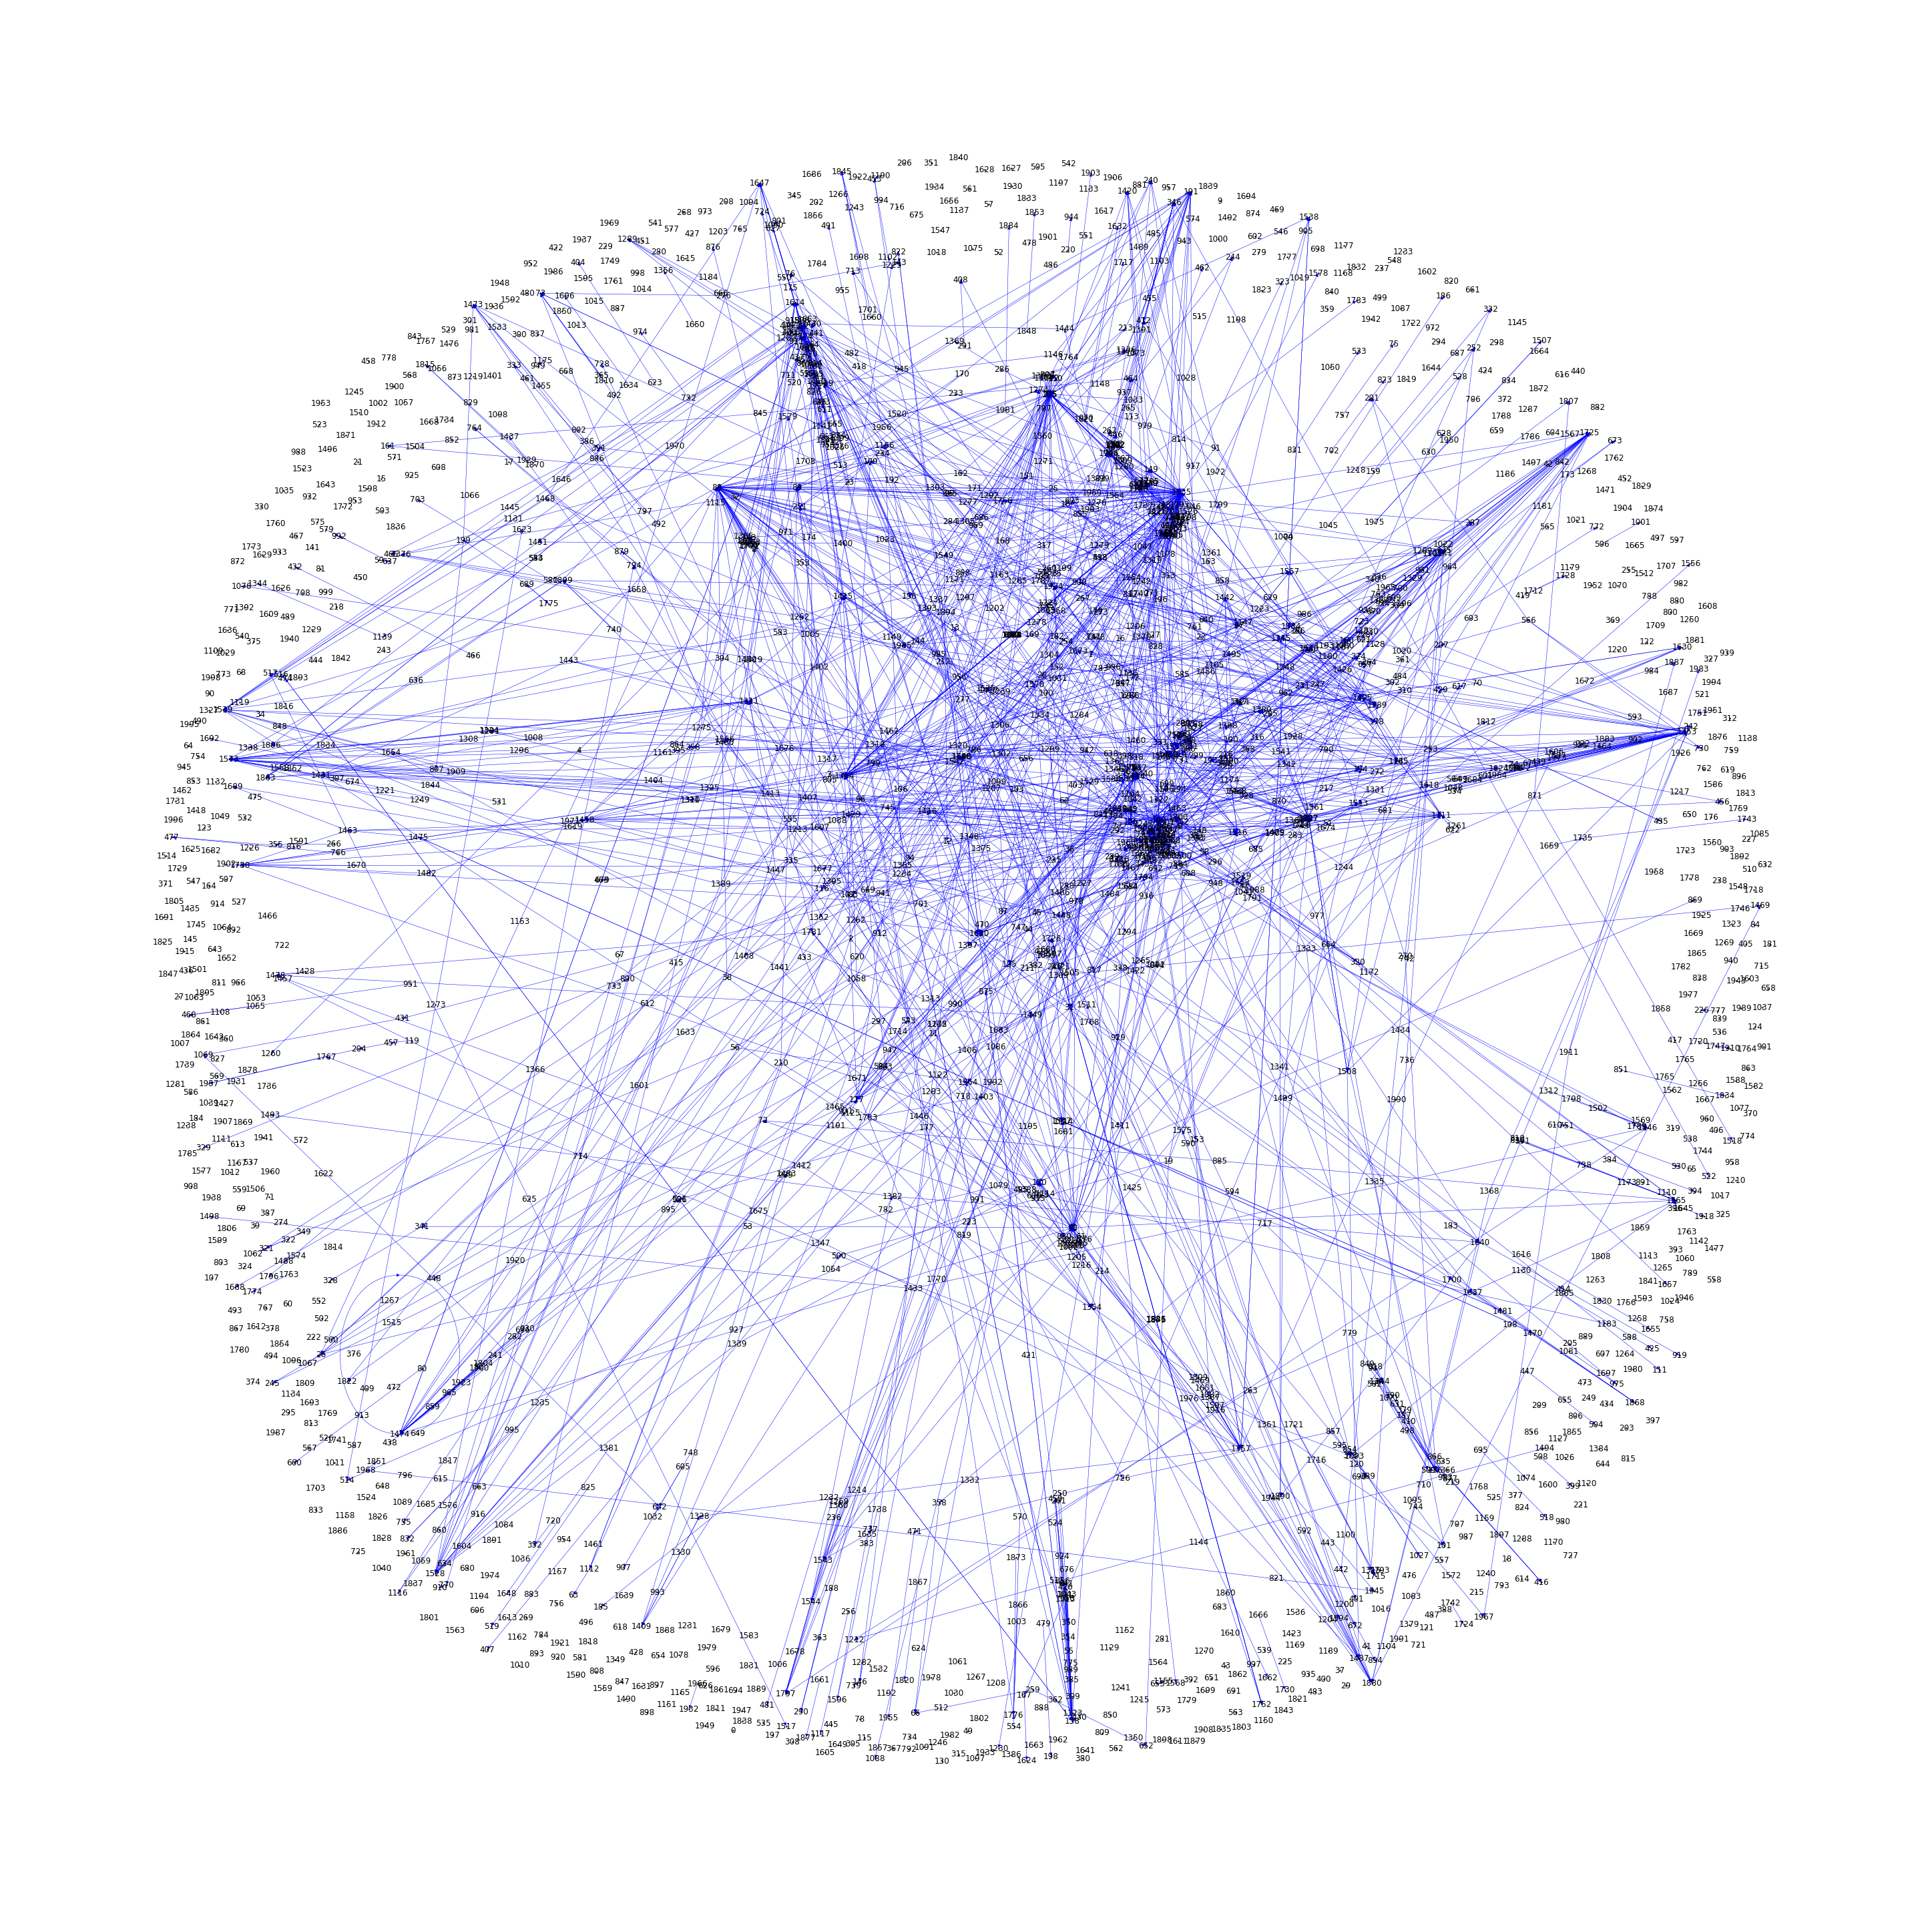

In [12]:
draw_plt_of_first_n_articles(Graph, 2000)

## Utils
Below is the main function we used to get the papers, in case you were wondering. You may want to use it to get more information about the papers.

In [13]:
# fields are separated by ",". For more information see https://api.semanticscholar.org/api-docs/graph
def request_papers_by_id(IDs, fields='title,url,year,fieldsOfStudy,citationCount,referenceCount'):
    papers = []
    for id in tqdm(IDs):
        response = requests.get(f'https://api.semanticscholar.org/graph/v1/paper/{id}?fields={fields}')
        js = response.json()
        papers.append(js)
        # sleep(3.1)
    return papers

In [ ]:
'''
Now i should explain if there is any difference between 
my answer and rhe answer of this library
there is no differnce
* note: number of iteration and damping factor are very important.
first i set damping factor to 0.85, so my answer was
far away from Networkx lib.
then I set it to 0.15 and then 0.10 it got closer.
I also set iteration number to 2K.
The answers are now exactly the same.
'''

In [25]:
# Node with maximum input edges
import math
all_parents = graph.all_parents
answer = -1000
answer_idx = -1
for i in range(len(all_parents)):
  list_p = all_parents[i]
  length = len(list_p)
  if length > answer:
    answer = length
    answer_idx = i
print("Number of input edges = " + str(answer))
print(df.iloc[answer_idx]['title'])
print(df.iloc[answer_idx]['year'])



Number of input edges = 227
RoBERTa: A Robustly Optimized BERT Pretraining Approach
2019


In [16]:
''''
مقالۀ بالا در سال های آتی بیشتر مطرح خواهد شد اما از آنجایی که به تازگی نوشته شده
است هنوز تاثیرگذاری عمیقی نداشته است و چند سال طول میکشد تا تاثیر خود به صورت زنجیروار بگذارد
'''
# Index = 1868
# Index = 112
# Index = 1353
# Index = 5474
# Index = 3753
# Index = 2681
# Index = 2146
# Index = 2376
# Index = 1647
# Index = 1750

In [ ]:
'''
to answer the last part of question:
Rank 1
title = A Maximum Likelihood Approach to Continuous Speech Recognition
Index = 1868
********
Rank 2
title = Foundations of statistical natural language processing
Index = 112
********
Rank 3
title = Class-Based n-gram Models of Natural Language
Index = 1353
********
Rank 4
title = Experiments with the Tangora 20,000 word speech recognizer
Index = 5474
********
Rank 5
title = Estimation of probabilities in the language model of the IBM speech recognition system
Index = 3753
********
Rank 6
title = A Maximum Entropy Model for Prepositional Phrase Attachment
Index = 2681
********
Rank 7
title = Gradient-based learning applied to document recognition
Index = 2146
********
Rank 8
title = Speech Recognition by Composition of Weighted Finite Automata
Index = 2376
********
Rank 9
title = Adaptive Statistical Language Modeling; A Maximum Entropy Approach
Index = 1647
********
Rank 10
title = Estimation of probabilities from sparse data for the language model component of a speech recognizer
Index = 1750

the most important paper is A Maximum Likelihood Approach to Continuous Speech Recognition
in the next i am going to show the exact info of this article
'''

In [18]:
print(df.iloc[1868])

paperId                    c4775e2f0d27e8be4aae7b5b5c2560b96ce2eb58
title             A Maximum Likelihood Approach to Continuous Sp...
abstract          Speech recognition is formulated as a problem ...
year                                                           1983
referenceCount                                                   33
citationCount                                                  1421
authors           [{'authorId': '2696176', 'name': 'L. Bahl'}, {...
k_references      [{'paperId': '1fd7e526e4a7ccf50cfad47e94425f14...
Name: 1868, dtype: object


In [ ]:
'''
as it is asked, this article in the most important one:
# Rank 1
Title = A Maximum Likelihood Approach to Continuous Speech Recognition
Author(s): L. Bahl F. Jelinek R. Mercer 
Index =1868
'''

In [20]:
'''
here you see the number of input edges
'''
all_ps = graph.all_parents[1868]
print(len(all_ps))

15


In [ ]:
'''
the wnodering thing is that it has not many number of 
input edges. it has only 15 input edges!
but this algorithm shows a markov model way that 
the value of other neighbors is also important
سال نگارش این مقاله نیز بسیار قدیمی است و مربوط به سال 1983 است و جزو اولین مقالاتی است
که در حوزه
Speech Recognition
نوشته شده است.
یعنی جزو مقالات مادر در این حوزه است که تاثیر زیادی در آینده علم گذاشته است و در رتبه بندی هم در رتبۀ بالایی قرار گرفته است.
'''

In [ ]:
'''
نهایتا توضیحاتی نیز درباره خود الگوریتم میدهم.
کلیت الگوریتم از همان مارکوف می آید.
یعنی ما اگر در صفحه ای باشیم و آن صفحه به 10 صفحه دیگر راه داشته باشد، شخص - فرض میکنیم - با احتمال یکسانی همه آنها را انتخاب میکند.
چراکه در این روش میگوید اگر سایتی خیلی خوب باشد در خیلی سایت ها هست و نیاز به روش پیچیده ای نیست.

نکته اینجاست که اگر راس الف به راس های ب و ج و د راه داشته باشد هر کدام
از اینها را به احتمال 1/3 انتخاب میکند.
حال اگر بخواهیم احتمال ایبن راسی که در آن حساب کرده باشیم باید تمام راههایی که ممکن است بتوانیم به این راس برسیم را در نظر بگیریم.
پس باید تمام پدران این راس را در نظر بگیریم. هر کدام از این پدرها به احتمال 1 تقسیم به یک عددی این راسی که میخواهیم را انتخاب میکنند.
آن یک چیزی هم تعداد فرزندانشان است یعنی همان یال های خروجی.
دلیل آن هم همانطور که گفته شد این است که تفاوتی میان یال های از پدر به فرزند برای انتخاب شدن نیست و همه شان به احتمال یکسان و گویا با توزیع یکنواخت انتخاب میشوند..
'''

In [ ]:
'''
بنابراین ایده کلیدی در همین فرمول زیر است:
  in_neighbors = graph.all_parents[index]
  pagerank_sum = sum((pageRanks[node] / len(graph.all_nodes_and_edges[node])) for node in in_neighbors)
  random_walk = damping_factor / n
  pageRanks[index] = random_walk + (1-damping_factor) * pagerank_sum
  که همان فرمولی است که توضیح داده شد.
  پس از تعداد خوبی حلقه یا همان ایتریشن، به عددی کانورج یا همان میل میکند.
  مثل همان مثال هوای آفتابی یا بارانی که در اسلایدهای درس نیز بود.
  در ان سوال نیز من ابتدا با دامپینگ فکتور دیگری تست کردم و کمی جواب متفاوت شد با جواب کتابخانه داده شده،
  اما با برابر کردم دامپینگ فاکتور این دو وهم چنین بالا بردن تعداد پیمایش حلقه ای، مشکل حل شد و خروجی ها عینا یکسان شدند.
'''

In [ ]:
'''
برای درک بهتر از ابن روابط، گرافی نیز رسم شده است.
همچنین در فرمول بالا که گفته شد یک عدد کوچک نیز داریم برای حرکات رندوم.
مثل همان اپسیلون گریدی  که در کیو لرنینگ داشتیم.
'''